In [516]:
import numpy as np
import matplotlib.pyplot as plt

## Smoothing COVID data

So we'll see how a convolution works on real data.
We'll get the latest mortality figures from **GitHub**.

The [source](https://github.com/CSSEGISandData/COVID-19) is maintained by John Hopkins University.


In [541]:
! ../.g


[master 61d4932] web
 2 files changed, 704 insertions(+), 1241 deletions(-)
 delete mode 100644 PROG/.~italy.ipynb
Counting objects: 4, done.
Delta compression using up to 12 threads.
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 171.47 KiB | 3.90 MiB/s, done.
Total 4 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/macbuse/macbuse.github.io.git
   75c568e..61d4932  master -> master


In [517]:
import requests
import pandas as pd

In [518]:
root_dir = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'
fn = 'time_series_covid19_%s_global.csv'

for ss in ['deaths','confirmed']:
    r = requests.get(root_dir + fn%ss, allow_redirects=True)
    open('covid_%s.csv'%ss, 'wb').write(r.content)

## Visualising the data again

We'll convert to a [Pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html).

- If you want to know more [read this in french](http://eric.univ-lyon2.fr/~ricco/tanagra/fichiers/fr_Tanagra_Data_Manipulation_Pandas.pdf).
- It's basically a table like in Excel
    - columns have names
    - rows are numbered and accessed using ```iloc```.


In [519]:
df = pd.read_csv('covid_deaths.csv')

---

## Looking for Italy


''' df.loc[149] ''' is what we want

In [520]:
country = 149
df.iloc[country]

Province/State        NaN
Country/Region      Italy
Lat               41.8719
Long              12.5674
1/22/20                 0
                   ...   
11/8/20             41394
11/9/20             41750
11/10/20            42330
11/11/20            42953
11/12/20            43589
Name: 149, Length: 300, dtype: object

---

It's often easier to work with a numpy array of values

In [461]:
deaths = df.iloc[country][4:].values
deaths[-50:]

array([35758, 35781, 35801, 35818, 35835, 35851, 35875, 35894, 35918,
       35941, 35968, 35986, 36002, 36030, 36061, 36083, 36111, 36140,
       36166, 36205, 36246, 36289, 36372, 36427, 36474, 36543, 36616,
       36705, 36832, 36968, 37059, 37210, 37338, 37479, 37700, 37905,
       38122, 38321, 38618, 38826, 39059, 39412, 39764, 40192, 40638,
       41063, 41394, 41750, 42330, 42953], dtype=object)

# Cumulative deaths

this looks pretty smooth

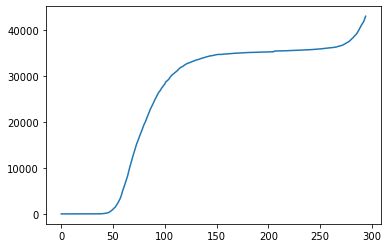

In [521]:
plt.plot(deaths);

Use ```np.diff``` to get daily death figures.

This is like differentiating the cumulative numbers.

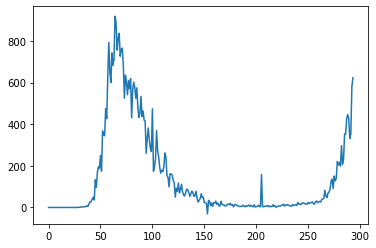

In [542]:
daily = np.diff(deaths,1)
plt.plot(daily);

Lets's look at the second wave

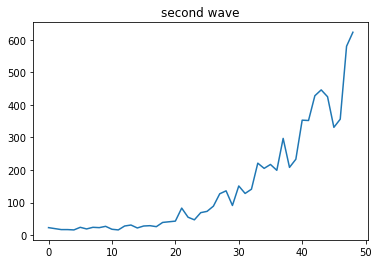

In [467]:
plt.plot(daily[-49:])
plt.title('second wave');

---

## Weekdays

The data is not too noisy compared with France.


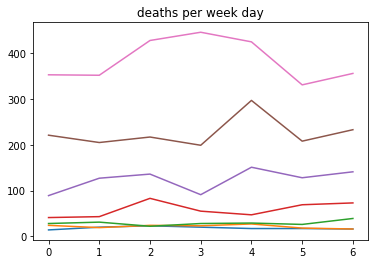

In [539]:
weeks = daily[-51:-2].reshape((-1,7))
for row in weeks:
    plt.plot(row)
    
plt.title('deaths per week day');

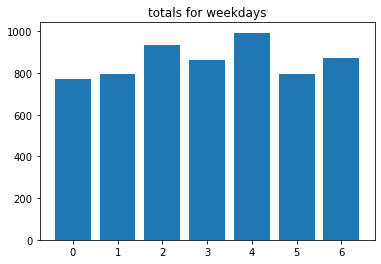

In [524]:
plt.bar(np.arange(7), np.sum(weeks, axis=0))
#plt.plot(np.sum(weeks, axis=0))
plt.title('totals for weekdays');

## Smoothing



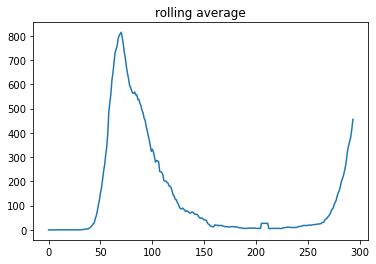

In [525]:
rolling_av = np.convolve(daily, np.ones(7)/7)[:-6]

plt.plot( rolling_av)
plt.title('rolling average');

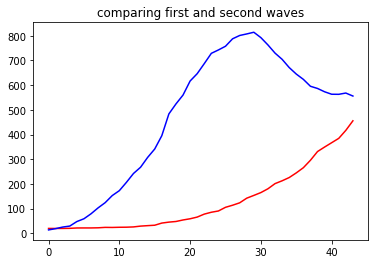

In [526]:
plt.plot(rolling_av[250:],'r')
plt.plot(rolling_av[41:85],'b');
plt.title('comparing first and second waves');

# Exponential  growth in deaths ?

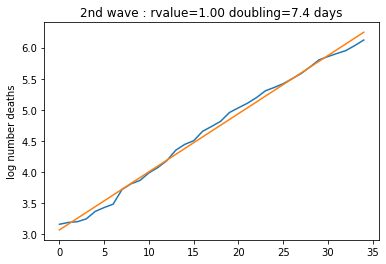

In [535]:
from scipy import stats

Y =  np.log(rolling_av[259:].tolist())
X = np.arange(len(Y))

#plot raw data
plt.plot(X,Y);

#do regression
coeffs = stats.linregress(X,Y)
a,b = coeffs.slope, coeffs.intercept

#plot regression curve
plt.plot( X[[0,-1]], a*X[[0,-1]] + b)
plt.title('2nd wave : rvalue={:.2f} doubling={:.1f} days'.format(coeffs.rvalue, np.log(2)/a) )
plt.ylabel('log number deaths');
    

---

## That's great!!


The exponential factor is quite big 
and the [doubling time](https://en.wikipedia.org/wiki/Doubling_time) is about a week !

That's funny because that is about the incubation period for COVID.

You can see that on the graph below.
The the curves get twice as high every time.

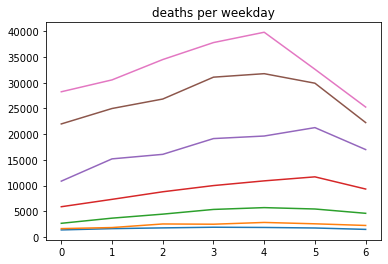

In [510]:
weeks = daily[-51:-2].reshape((-1,7))
for row in weeks:
    plt.plot(row)
    
plt.title('deaths per weekday');

---

## Confirmed cases

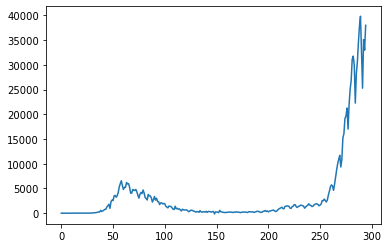

In [545]:
df = pd.read_csv('covid_confirmed.csv')

cases =  df.iloc[country][4:].values
daily = np.diff(cases, 1)
plt.plot(daily);

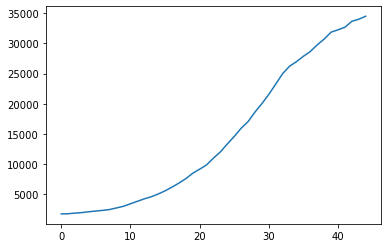

In [546]:
smoothed = np.convolve(daily, np.ones(7)/7)[:-6]
plt.plot(smoothed[250:]);

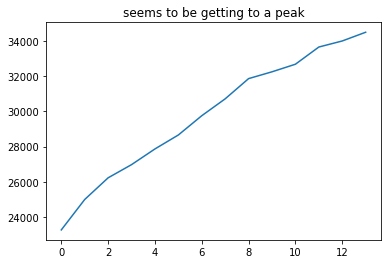

In [547]:

smoothed = np.convolve(daily, np.ones(7)/7)
plt.plot(smoothed[-20:-6]);
plt.title('seems to be getting to a peak');

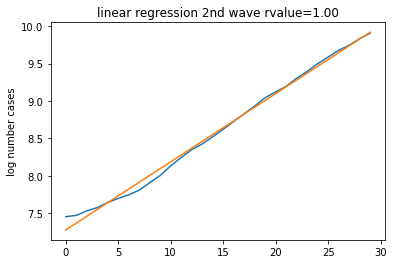

In [498]:
Y = smoothed[250:280].tolist()
X = np.arange(len(Y))

Y = np.log(Y)
plt.plot(X,Y)

coeffs = stats.linregress(X,Y)
a,b = coeffs.slope, coeffs.intercept

plt.plot( X[[0,-1]], a*X[[0,-1]] + b)
plt.title('linear regression 2nd wave rvalue={:.2f}'.format(coeffs.rvalue))
plt.ylabel('log number cases');

In [499]:
np.log(2)/a, np.log(2)

(7.621043977754113, 0.6931471805599453)

# Mortality rate for the second wave

In [507]:
(deaths[-1] - deaths[250])/ (cases[-1] - cases[250])

0.009904331576158202

In [540]:
! ../.g 

[master 75c568e] web
 2 files changed, 1241 deletions(-)
 copy PROG/{italy.ipynb => .~italy.ipynb} (100%)
 rewrite PROG/italy.ipynb (100%)
Counting objects: 3, done.
Delta compression using up to 12 threads.
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 298 bytes | 298.00 KiB/s, done.
Total 3 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/macbuse/macbuse.github.io.git
   913c722..75c568e  master -> master
